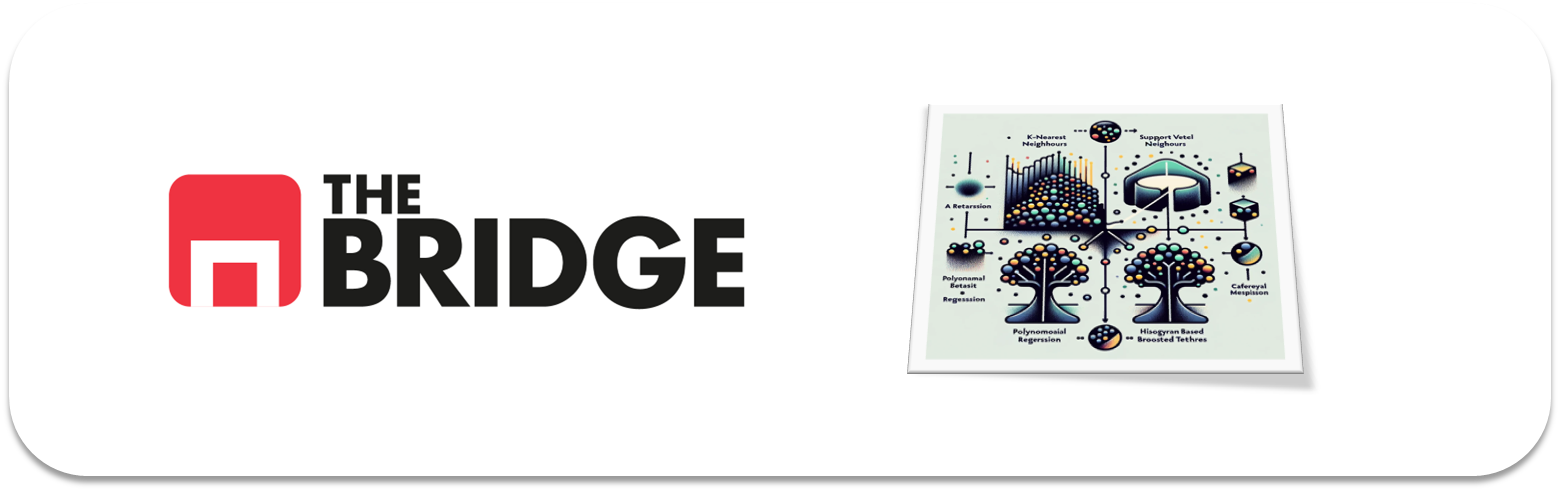

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [859]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as bt

from sklearn.model_selection import train_test_split,  RandomizedSearchCV
from scipy.stats import mannwhitneyu, chi2_contingency
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [799]:
df_credit = pd.read_csv("./data/credit_npo.csv")
df_credit

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


**Descripción textual de variables y primera tipificación:**  

|Columna/Variable|Tipo_de_Variable|Descripción|Importancia inicial|
|-|-|-|-|
|Serious Dlqin 2yrs|Binaria|Personas que tendrán problemas financieros en los próximos dos años|TARGET||
|Revolving Utilization of Unsecured lines|Numérica Continua|Uso de líneas de crédito revolving, ratios? debería preguntar a negocio por más info sobre esta variable|||
|age|Numérica Discreta|Edad del cliente|||
|Number of time 30-59Days past due not worse|Numérica Discreta|Nº veces que el cliente ha tardado entre 30-59 días en regularizar sus recibos|La convertiremos a categórica||
|DebtRatio|Numérica Continua|Ratio de deuda|||
|Monthly Income|Numérica Continua|Salario mensual|||
|Number of Open Credit Lines And Loans|Numérica Discreta|Nº de líneas de crédito del cliente|||
|Number of Times 90Days Late|Numérica Discreta|Nº veces que el cliente ha tardado más de 90 días en regularizar sus recibos|||
|Number Real Estate Loans or Lines|Numérica Discreta|Nº de hipotecas o similares del cliente - mercado inmobiliario|La trataremos como categórica||
|Number of time 60-89Days Past Due not worse|Numérica Discreta|Nº veces que el cliente ha tardado entre 60-89 días en regularizar sus recibos|La trataremos como categórica||
|Number of Dependents|Numérica Discreta|Nº de personas a su cargo|La trataremos como categórica||



In [800]:
df_credit.NumberOfDependents.value_counts() # vamos a tratarla como una categórica y reducirla a 5: unificamos en una las categorías de 4 familiares a cargo para arriba

NumberOfDependents
0.0     6935
1.0     2384
2.0     1816
3.0      882
4.0      253
5.0       62
6.0       24
8.0        2
10.0       1
7.0        1
Name: count, dtype: int64

In [801]:
df_credit

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [802]:
df_credit.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

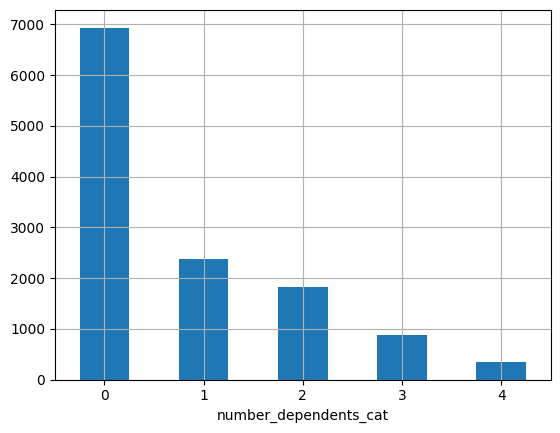

In [803]:
# Conversión de NumberOfDependents a categórica --> 5 categorías

df_credit["number_dependents_cat"] = pd.cut(df_credit["NumberOfDependents"],
                               bins=[-np.inf, 0, 1, 2, 3, np.inf], # definimos los intervalos donde pondremos el límite de los valores que caen en cada categoria
                               labels=[0, 1, 2, 3, 4])  # y asignamos una etiqueta a cada categoria anterior, la categoria 4 es 4 o más 

df_credit["number_dependents_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True); 

In [804]:
df_credit.NumberOfTimes90DaysLate.value_counts() # esta también la pasamos a categórica, pero vemos que hay un valor a 98?

NumberOfTimes90DaysLate
0     11839
1       412
2       147
3        55
4        33
98       21
5        14
6         6
7         4
8         3
10        1
9         1
13        1
Name: count, dtype: int64

In [805]:
df_credit[df_credit.NumberOfTimes90DaysLate == 98] 
# echando un vistazo muy por encima, vemos que la categoría que cae en 98  tiene valores prácticamente idénticos en el resto de variables salvo por la edad
# en cuanto al salario mensual, por norma general cae en los ratios más bajos del dataset. Podemos suponer que éstos son clientes que llevan mucho tiempo con impagos.
# 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,number_dependents_cat
32,1,1.0,43,98,96.000000,NaN,0,98,0,98,0.0,0
74,0,1.0,26,98,0.000000,NaN,0,98,0,98,0.0,0
483,1,1.0,44,98,0.037367,2916.0,0,98,0,98,2.0,2
524,0,1.0,29,98,0.000000,NaN,0,98,0,98,0.0,0
1123,1,1.0,25,98,54.000000,NaN,0,98,0,98,0.0,0
1182,0,1.0,25,98,0.020344,1916.0,0,98,0,98,0.0,0
3803,1,1.0,25,98,0.000000,640.0,0,98,0,98,0.0,0
4232,0,1.0,28,98,0.000000,NaN,0,98,0,98,NaN,NaN
4312,0,1.0,22,98,0.000000,NaN,0,98,0,98,NaN,NaN
4722,1,1.0,51,98,0.000000,7500.0,0,98,0,98,0.0,0


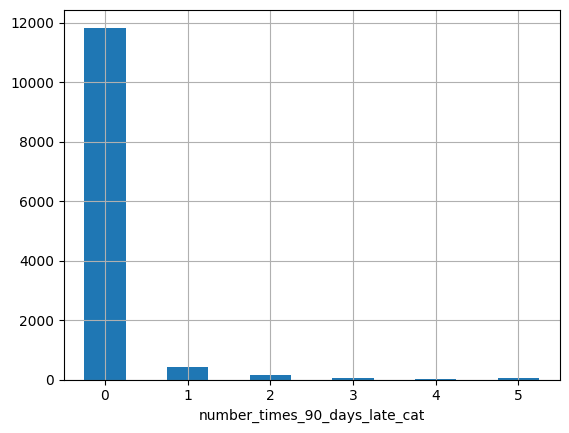

In [806]:
# Conversión de NumberOfTimes90DaysLate a categórica --> 6 categorías

df_credit["number_times_90_days_late_cat"] = pd.cut(df_credit["NumberOfTimes90DaysLate"],
                               bins=[-np.inf, 0, 1, 2, 3, 4, np.inf], # definimos los intervalos donde pondremos el límite de los valores que caen en cada categoria
                               labels=[0, 1, 2, 3, 4, 5])  # y asignamos una etiqueta a cada categoria anterior, la categoria 5 es 5 veces o más 

df_credit["number_times_90_days_late_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True); 

In [807]:
df_credit["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     11901
1       492
2        86
98       21
3        18
4        14
5         4
11        1
Name: count, dtype: int64

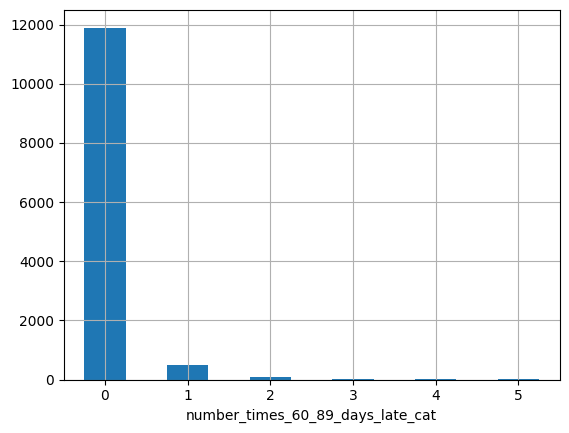

In [808]:
# Conversión a 6 categorías

df_credit["number_times_60_89_days_late_cat"] = pd.cut(df_credit["NumberOfTime60-89DaysPastDueNotWorse"],
                               bins=[-np.inf, 0, 1, 2, 3, 4, np.inf], # definimos los intervalos donde pondremos el límite de los valores que caen en cada categoria
                               labels=[0, 1, 2, 3, 4, 5])  # y asignamos una etiqueta a cada categoria anterior, la categoria 5 es 5 veces o más 

df_credit["number_times_60_89_days_late_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True); 

In [809]:
df_credit["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     10500
1      1377
2       401
3       128
4        64
5        23
98       21
6        20
8         2
7         1
Name: count, dtype: int64

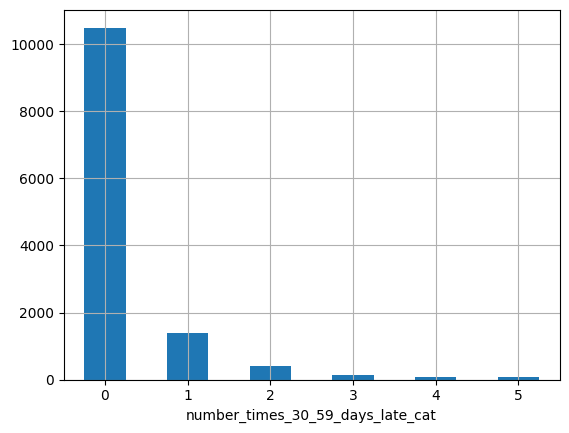

In [810]:
# Conversión a 6 categorías

df_credit["number_times_30_59_days_late_cat"] = pd.cut(df_credit["NumberOfTime30-59DaysPastDueNotWorse"],
                               bins=[-np.inf, 0, 1, 2, 3, 4, np.inf], # definimos los intervalos donde pondremos el límite de los valores que caen en cada categoria
                               labels=[0, 1, 2, 3, 4, 5])  # y asignamos una etiqueta a cada categoria anterior, la categoria 5 es 5 veces o más 

df_credit["number_times_30_59_days_late_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True); 

In [811]:
# tipificamos las variables con nuestra función del toolbox del último teamchallenge

def tipifica_variables(dataframe, umbral_categoria = int, umbral_continua = float):

    df_resultado = pd.DataFrame([dataframe.nunique(), dataframe.nunique()/len(dataframe)*100]).T.rename(columns = {0: "Cardinalidad", 1: "%_Cardinalidad"})
    
    df_resultado["Tipo"] = "Numérica Discreta"
    df_resultado.loc[df_resultado["Cardinalidad"] < umbral_categoria, "Tipo"] = "Categórica"
    df_resultado.loc[df_resultado["Cardinalidad"] == 2.0, "Tipo"] = "Binaria"
    df_resultado.loc[df_resultado["%_Cardinalidad"] >= umbral_continua, "Tipo"] = "Numérica Continua"

    return df_resultado

In [812]:
# obtenemos la misma clasificación que la pre-establecida en el primer overview, solo tenemos una variable categórica que además es el target

df_tipo = tipifica_variables(df_credit, 7, 15.00)
df_tipo

,Cardinalidad,%_Cardinalidad,Tipo
SeriousDlqin2yrs,2.0,0.015953,Binaria
RevolvingUtilizationOfUnsecuredLines,10764.0,85.857861,Numérica Continua
age,78.0,0.622158,Numérica Discreta
NumberOfTime30-59DaysPastDueNotWorse,10.0,0.079764,Numérica Discreta
DebtRatio,11547.0,92.103374,Numérica Continua
MonthlyIncome,4167.0,33.237617,Numérica Continua
NumberOfOpenCreditLinesAndLoans,43.0,0.342985,Numérica Discreta
NumberOfTimes90DaysLate,13.0,0.103693,Numérica Discreta
NumberRealEstateLoansOrLines,16.0,0.127622,Numérica Discreta
NumberOfTime60-89DaysPastDueNotWorse,8.0,0.063811,Numérica Discreta


In [813]:
# Pasamos a lista las variables categóricas

lista_cat = df_tipo[df_tipo.Tipo == "Categórica"].index.to_list()

lista_cat

['number_dependents_cat',
 'number_times_90_days_late_cat',
 'number_times_60_89_days_late_cat',
 'number_times_30_59_days_late_cat']

In [814]:
# Pasamos a lista las variables numéricas:

lista_num = df_tipo[df_tipo.Tipo != "Categórica"].index.to_list()

# quitamos el target y las que hemos convertido a categóricas:

lista_num.remove("SeriousDlqin2yrs")
lista_num.remove("NumberOfTime30-59DaysPastDueNotWorse")
lista_num.remove("NumberOfTime60-89DaysPastDueNotWorse")
lista_num.remove("NumberOfTimes90DaysLate")
lista_num.remove("NumberOfDependents")

lista_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines']

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Estamos ante un problema de clasificación, pues nuestra variable target 'seriousdlqin2years' es binaria.

In [815]:
target = "SeriousDlqin2yrs"  # la instanciamos

### #1.3
Pinta la distribución de frecuencias del target y coméntala

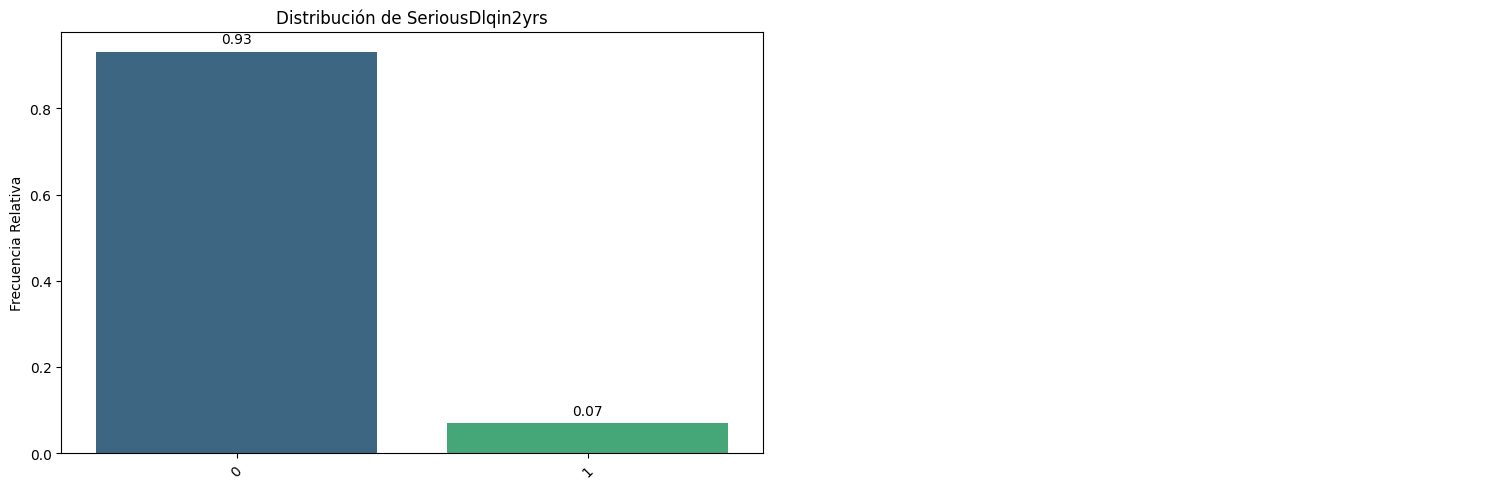

In [816]:
bt.pinta_distribucion_categoricas(df_credit,[target],relativa=True,mostrar_valores=True)

# Observamos una distribución muy desbalanceada con un 93% de personas que no tendrán problemas financieros en los próximos 2 años frente a un 7% que sí.

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [817]:
df_credit.info() # tenemos nulos en las variables 'monthly income' y en 'number of dependents'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   SeriousDlqin2yrs                      12537 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64 
 2   age                                   12537 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64   
 4   DebtRatio                             12537 non-null  float64 
 5   MonthlyIncome                         11816 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64   
 7   NumberOfTimes90DaysLate               12537 non-null  int64   
 8   NumberRealEstateLoansOrLines          12537 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64   
 10  NumberOfDependents                    12360 non-null  float64 
 11  nu

In [818]:
# Los nulos de esta variable representan un 1.4% del total, menos de 200 instancias. Las eliminamos. Son los mismos que en su versión categórica.

df_credit.NumberOfDependents.value_counts(dropna=False, normalize=True) 

NumberOfDependents
0.0     0.553163
1.0     0.190157
2.0     0.144851
3.0     0.070352
4.0     0.020180
NaN     0.014118
5.0     0.004945
6.0     0.001914
8.0     0.000160
10.0    0.000080
7.0     0.000080
Name: proportion, dtype: float64

In [819]:
df_credit.dropna(subset=["NumberOfDependents"], inplace=True)
df_credit[df_credit.NumberOfDependents.isna()] # comprobamos que se han eliminado las filas de nulos 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,number_dependents_cat,number_times_90_days_late_cat,number_times_60_89_days_late_cat,number_times_30_59_days_late_cat


In [820]:
df_credit.MonthlyIncome.value_counts(dropna=False, normalize=True)  # los nulos en monthly income representan solo un 5.7%

MonthlyIncome
NaN        0.044013
5000.0     0.022249
4000.0     0.016262
6000.0     0.015049
3000.0     0.014725
             ...   
39500.0    0.000081
12040.0    0.000081
8080.0     0.000081
17541.0    0.000081
12016.0    0.000081
Name: proportion, Length: 4168, dtype: float64

In [821]:
df_credit.describe().T 

# Observamos que hay mucha descompensación en la variable, ya que pasamos de cero ingresos a un sueldo de 70.000$. Si imputamos la media o la mediana, no representaremos necesariamente
# la realidad. Al ser un porcentaje de datos tan pequeño, también los eliminaremos.


,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12360.0,0.069660,0.254584,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12360.0,0.331980,0.367750,0.0,0.031688,0.167922,0.584839,6.0
age,12360.0,51.891990,14.891193,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12360.0,0.399272,3.891175,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12360.0,1.636857,8.412344,0.0,0.142716,0.300550,0.499757,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12360.0,8.555178,5.155691,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12360.0,0.247006,3.869450,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12360.0,1.013511,1.136054,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12360.0,0.215696,3.851594,0.0,0.000000,0.000000,0.000000,98.0


In [822]:
df_credit.dropna(subset=["MonthlyIncome"], inplace=True)

In [823]:
df_credit.info() # ya tenemos el dataset listo para la partición en train y test

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   SeriousDlqin2yrs                      11816 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64 
 2   age                                   11816 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64   
 4   DebtRatio                             11816 non-null  float64 
 5   MonthlyIncome                         11816 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64   
 7   NumberOfTimes90DaysLate               11816 non-null  int64   
 8   NumberRealEstateLoansOrLines          11816 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64   
 10  NumberOfDependents                    11816 non-null  float64 
 11  number_

In [824]:
df_backup = df_credit.copy()   # nos creamos una copia como back up

In [825]:
# Train / test split

X = df_credit.drop(target, axis=1)   # quitamos el target del conjunto de datos antes de entrenar

X_train, X_test, y_train, y_test = train_test_split(X, df_credit[target], test_size=0.2, random_state=42)

In [826]:
X_train.shape

(9452, 14)

In [827]:
y_train.shape

(9452,)

In [828]:
X_test.shape

(2364, 14)

In [829]:
y_test.shape

(2364,)

In [830]:
# Mini-EDA, análisis bivariante target vs resto de variables numéricas

df_eda = X_train.copy()
df_eda[target] = y_train.copy() # añado el target al df_eda para poder realizar el análisis

In [831]:
# BIVARIANTE TARGET (binaria) vs CATEGÓRICAS --> TEST CHI2 para comparar categóricas.

# iteramos la lista de categóricas que instanciamos anteriormente y aplicamos el test de confianza Chi2 contra el target. 
features_catego = []
for catego in lista_cat:
    
    tabla_contingencia = pd.crosstab(df_eda[target], df_eda[catego])

    chi2, pvalue, dof, expected = chi2_contingency(tabla_contingencia)

    # Nos quedamos con aquellas cuyo pvalue sea igual o menor que 0.05 y las añadimos a la lista de features categóricas
    
    if pvalue <= 0.05:
        features_catego.append(catego)   
        print(f"P-value de {catego} contra target:", pvalue)

# Todas superan el test, podemos rechazar la hipótesis nula y afirmar que las variables están relacionadas entre sí.
 
print("\n")
print("Selección de features numéricas en base al test Chi-2:")

features_catego

# La que más discrimina es 'Number of times 90 days late', seguida de las otras 2 que representan días de retraso del cliente con sus pagos.
# Éstas serán las principales predictoras de las categóricas.

P-value de number_dependents_cat contra target: 0.0012391229437600044
P-value de number_times_90_days_late_cat contra target: 1.7606798355134144e-302
P-value de number_times_60_89_days_late_cat contra target: 5.341433178049449e-147
P-value de number_times_30_59_days_late_cat contra target: 7.908706630634216e-156


Selección de features numéricas en base al test Chi-2:


['number_dependents_cat',
 'number_times_90_days_late_cat',
 'number_times_60_89_days_late_cat',
 'number_times_30_59_days_late_cat']

c:\Users\tania\Desktop\Tania\Bootcamp\repo_local_ESPEJO\DS_Online_Febr25_Exercises\04_Machine_Learning\Sprint_12\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


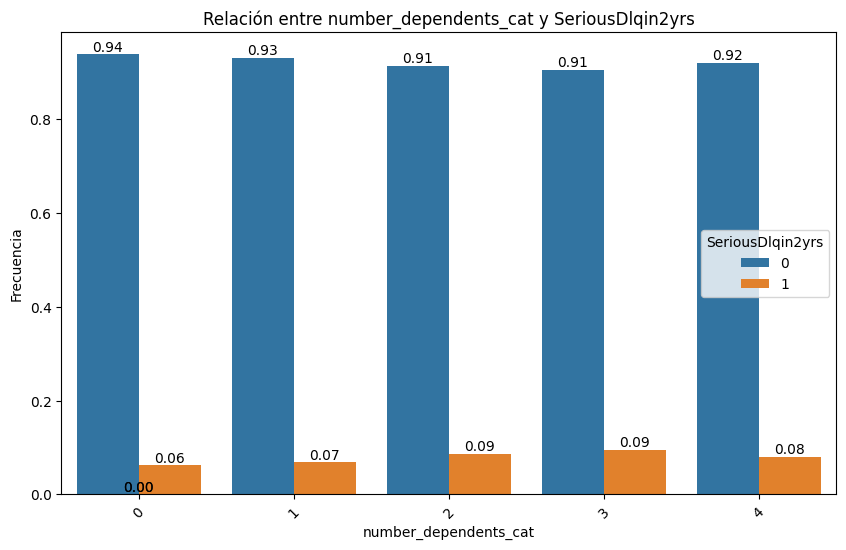

c:\Users\tania\Desktop\Tania\Bootcamp\repo_local_ESPEJO\DS_Online_Febr25_Exercises\04_Machine_Learning\Sprint_12\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


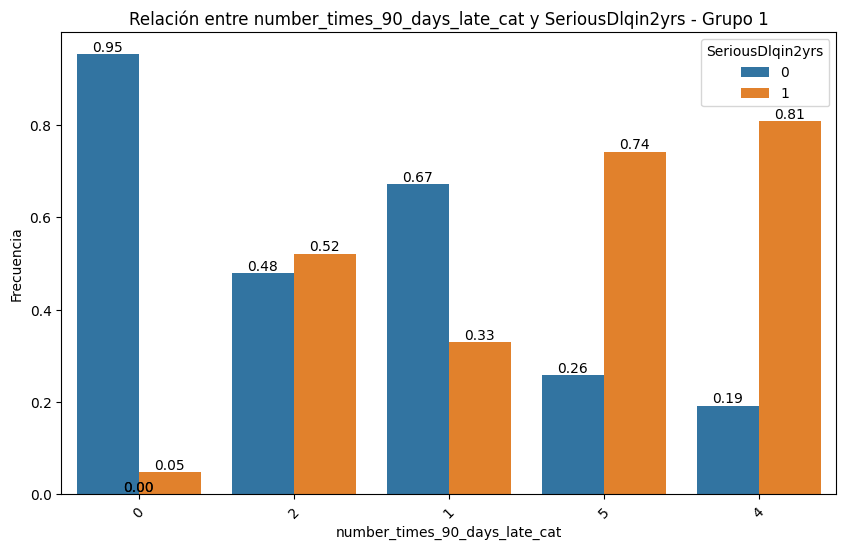

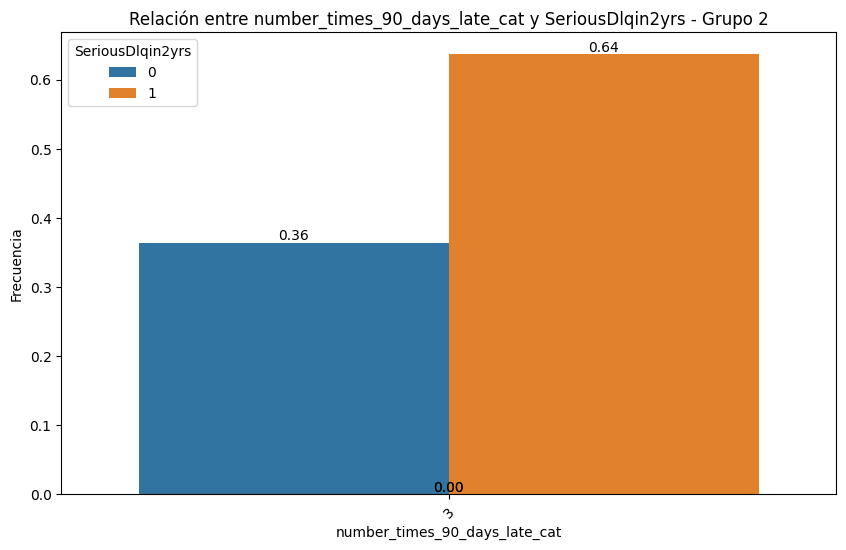

c:\Users\tania\Desktop\Tania\Bootcamp\repo_local_ESPEJO\DS_Online_Febr25_Exercises\04_Machine_Learning\Sprint_12\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


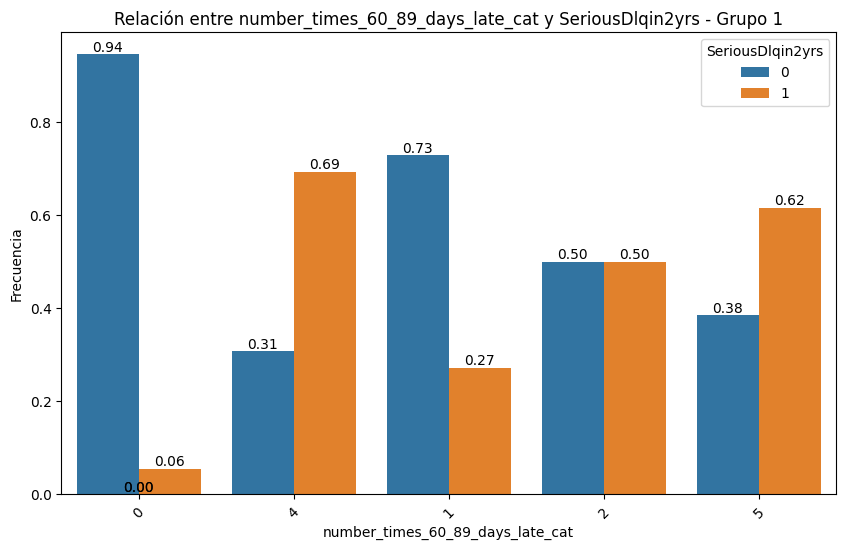

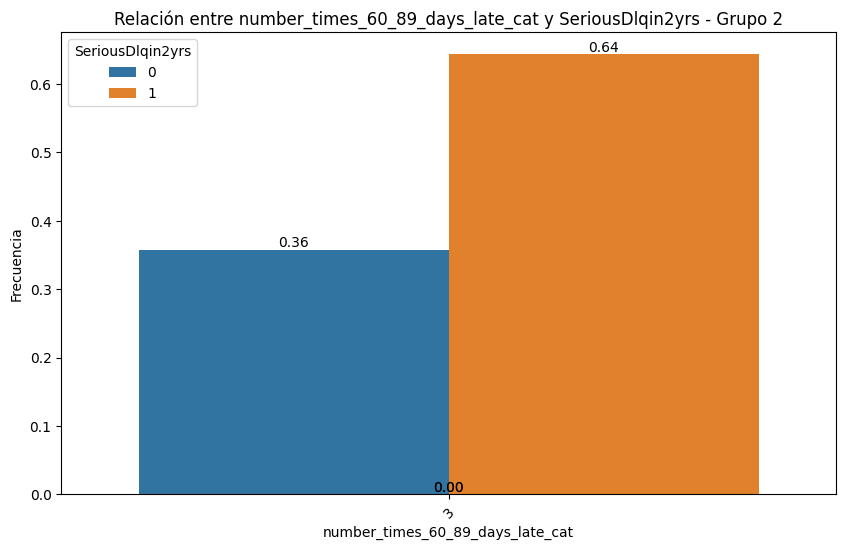

c:\Users\tania\Desktop\Tania\Bootcamp\repo_local_ESPEJO\DS_Online_Febr25_Exercises\04_Machine_Learning\Sprint_12\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


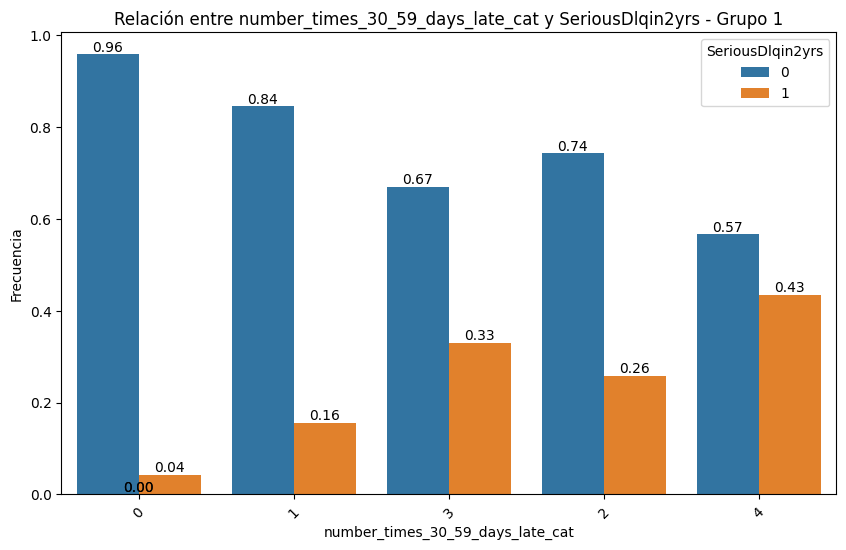

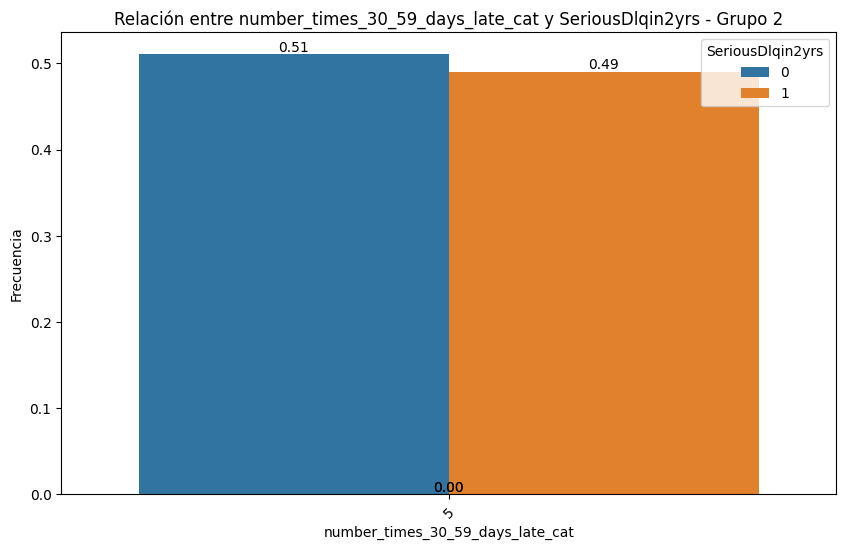

In [832]:
# VISUALIZACIÓN

for catego in features_catego:
    
    bt.plot_categorical_relationship_fin(df_eda, catego, target, relative_freq = True, show_values = True)

In [833]:
# BIVARIANTE TARGET (binaria) vs NUMÉRICAS --> TEST DE CONFIANZA U de Mann-Whitney

# Con un pequeño bucle, iteramos la lista de las numéricas que hemos instanciado anteriormente y aplicamos el test U de Mann Whitney para quedarnos con aquellas que estén
# relacionadas con nuestra target, es decir, que superen el umbral de confianza estadística con un 95%.
 
features_num = []   # añadiremos a esta lista aquellas variables que superen el test
for variable in lista_num:    
        
    grupo_a = df_eda.loc[df_eda[target] == 1][variable]  
    grupo_b = df_eda.loc[df_eda[target] == 0][variable]

# empleamos el test U de mann whitney puesto que queremos testear una binaria (target) contra variables numéricas 
    u_stat, p_value = mannwhitneyu(grupo_a, grupo_b)

    if p_value <= 0.05:   # igual que hicimos con las categóricas, todas aquellas cuyo pvaleu sea igual o inferior a 0.05, entran en la lista de selección de features
        features_num.append(variable)   
        print(f"P-value de {variable} contra target:", p_value)

# Todas superan el umbral de confianza estadística del 95%.
print("\n")
print("Selección de features numéricas en base al test U de Mann-Whitney:")

features_num  # ya tenemos nuestra primera versión lista de features para eentrenar el modelo, ahora pintaremos las gráficas para visualizar su distribución

# La que más discrimina más es 'Number of Times 90Days Late', seguida de 'Number of Times 30-59 Days Late'. 
# La que menos es 'Number Real Estate Loand or Lines'

P-value de RevolvingUtilizationOfUnsecuredLines contra target: 6.964140175938447e-127
P-value de age contra target: 1.2329564748313774e-26
P-value de DebtRatio contra target: 1.920288228898668e-05
P-value de MonthlyIncome contra target: 4.937655211085432e-09
P-value de NumberOfOpenCreditLinesAndLoans contra target: 5.276240582379398e-05
P-value de NumberRealEstateLoansOrLines contra target: 0.002619617920579262


Selección de features numéricas en base al test U de Mann-Whitney:


['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines']

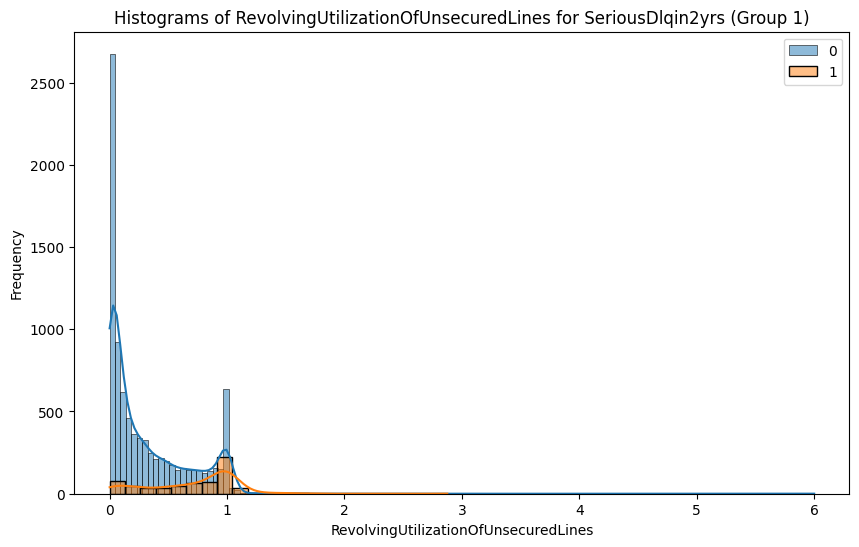

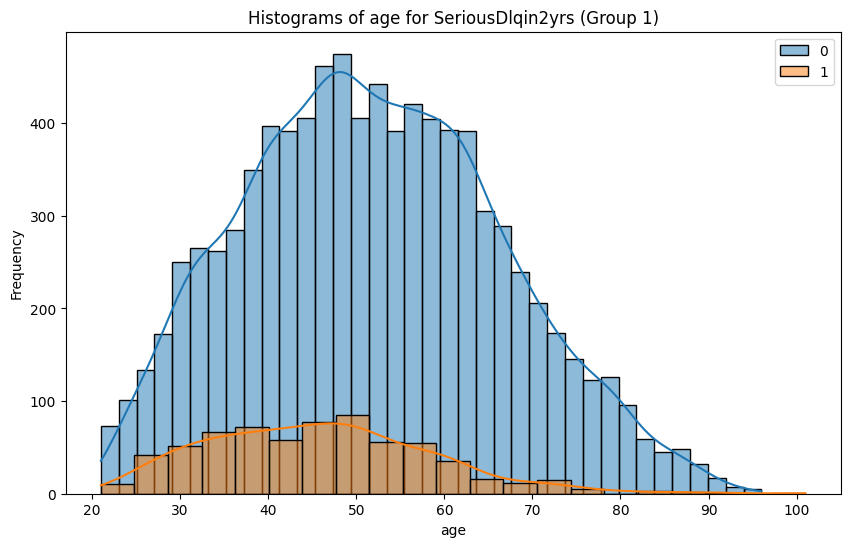

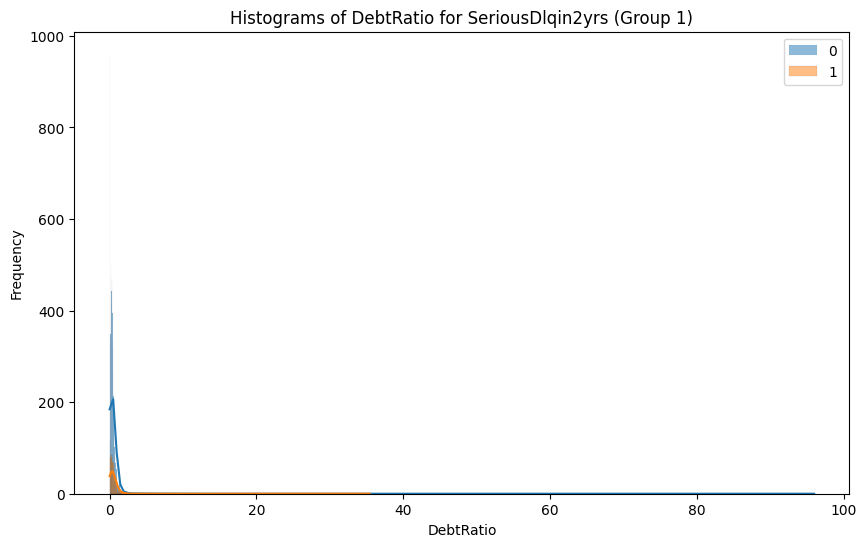

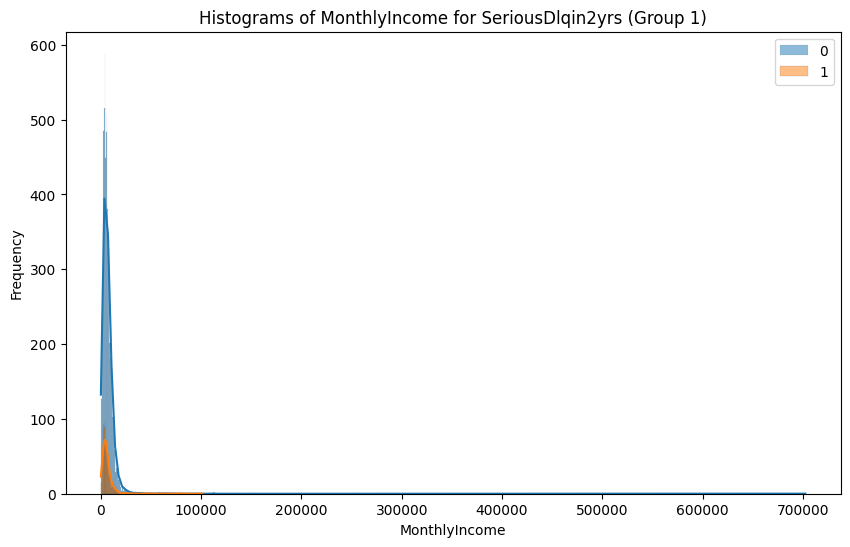

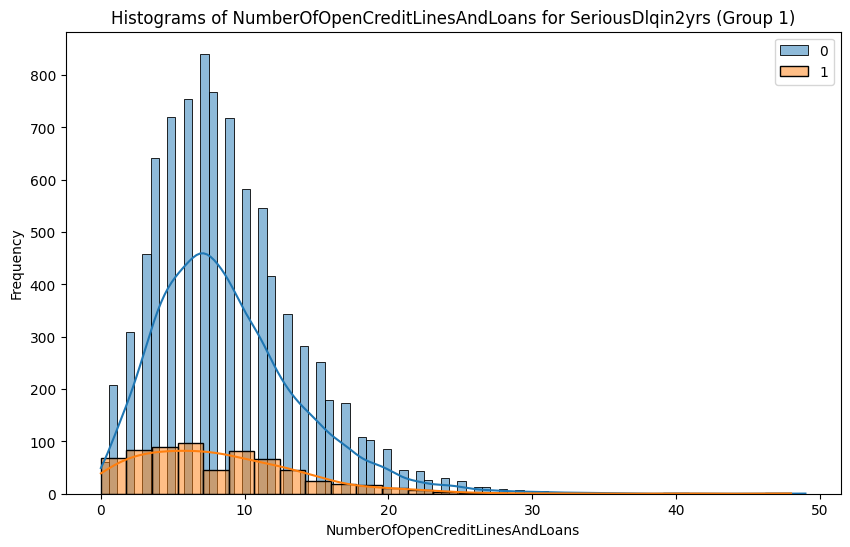

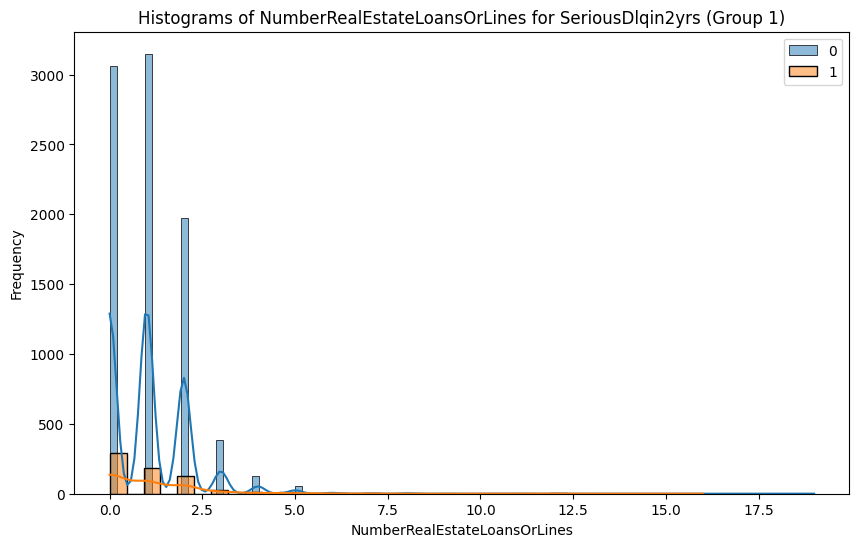

In [834]:
# VISUALIZACIÓN

# pintamos los histogramas + kde del target para cada variable numérica

for num in features_num:
    bt.plot_grouped_histograms(df_eda, target,num, group_size=2)

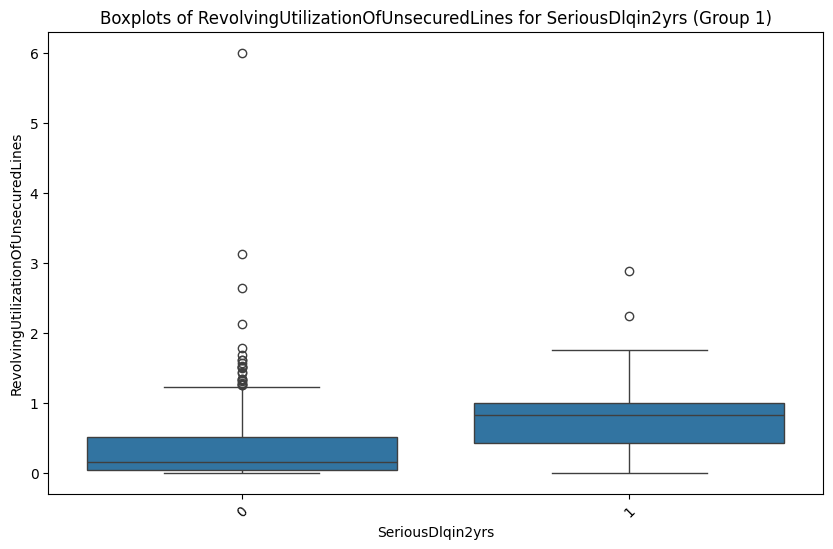

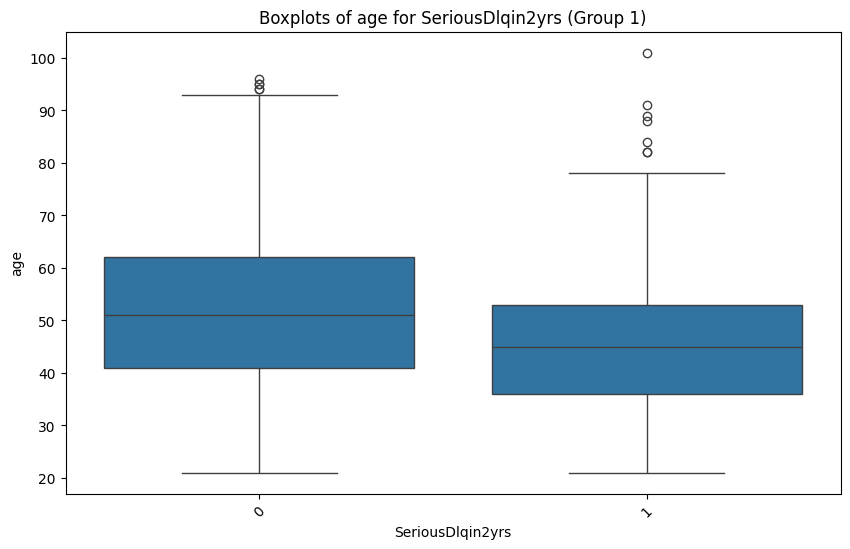

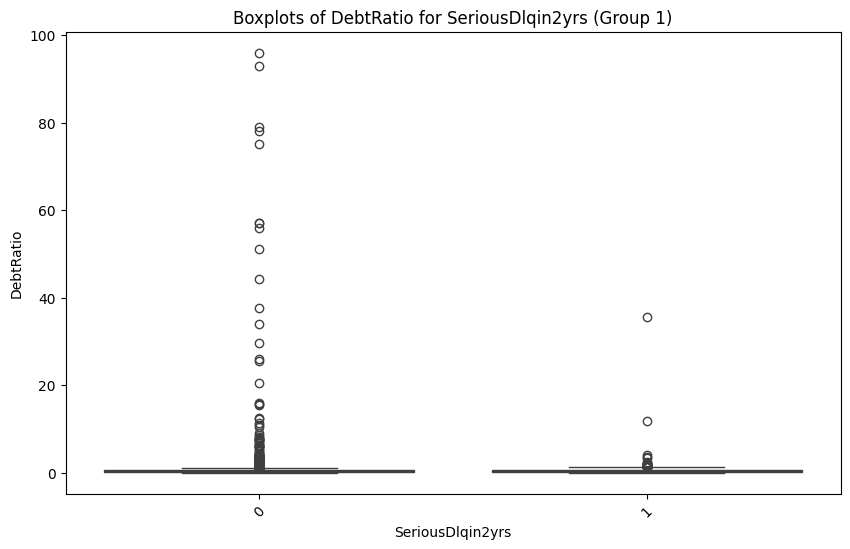

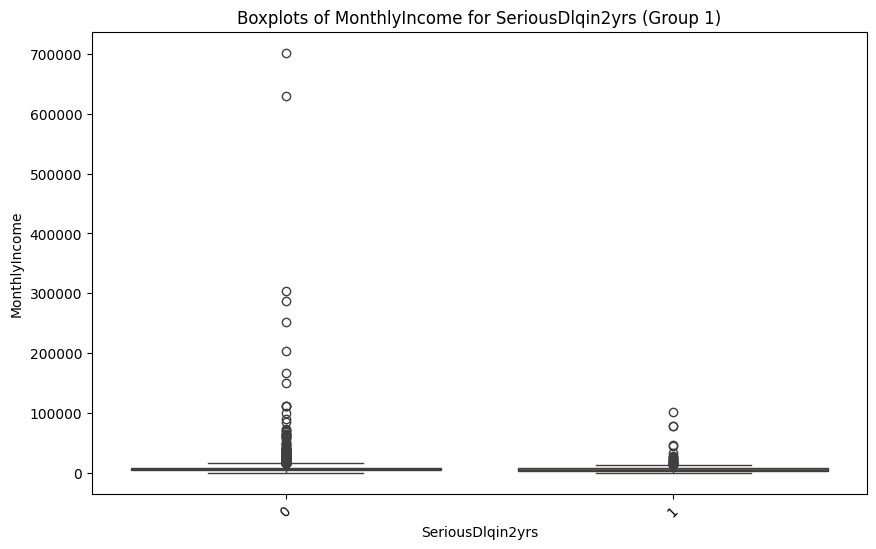

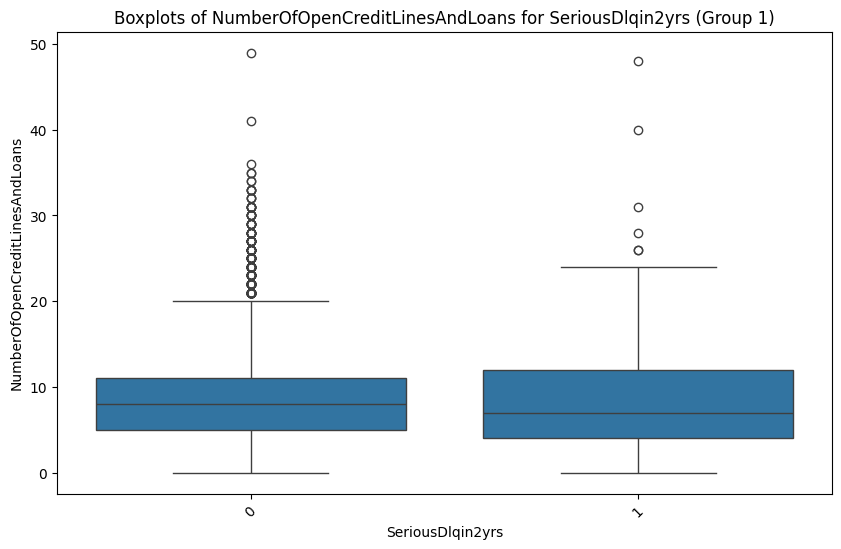

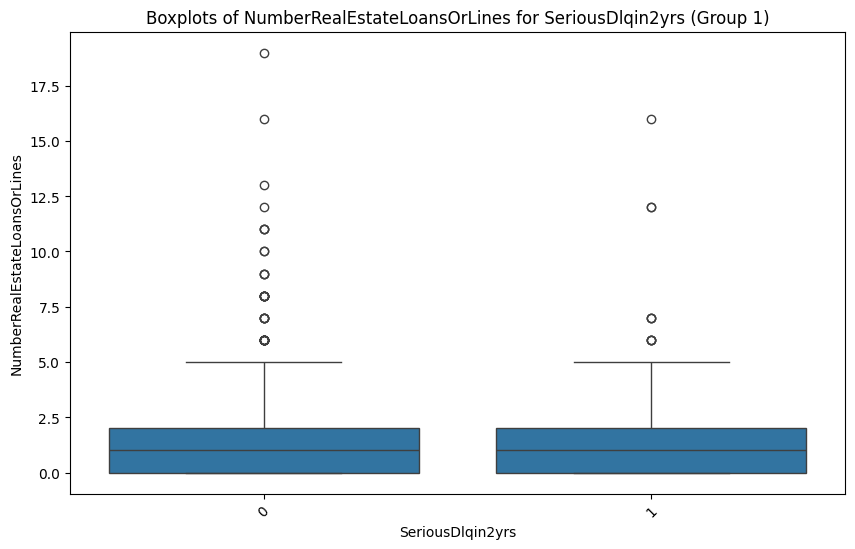

In [835]:
# ahora pintamos los boxplots

for num in features_num:
    bt.plot_grouped_boxplots(df_eda,target, num)

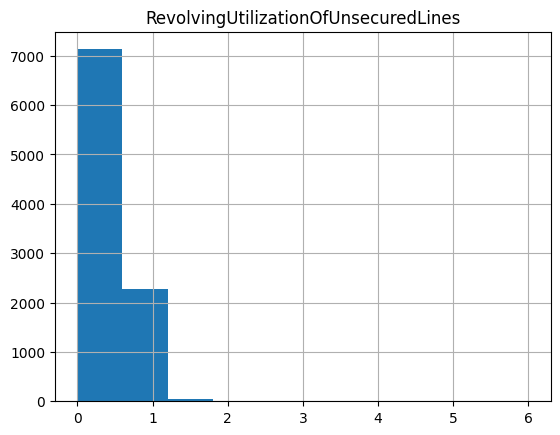

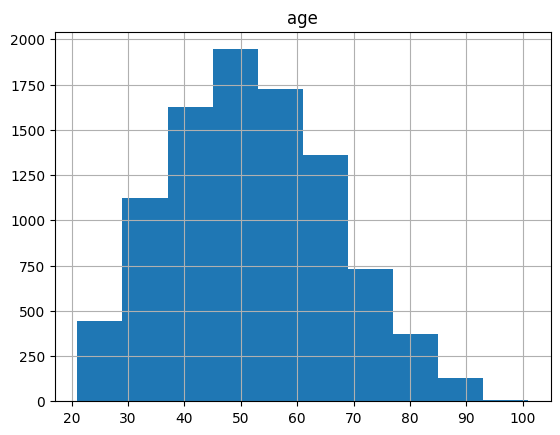

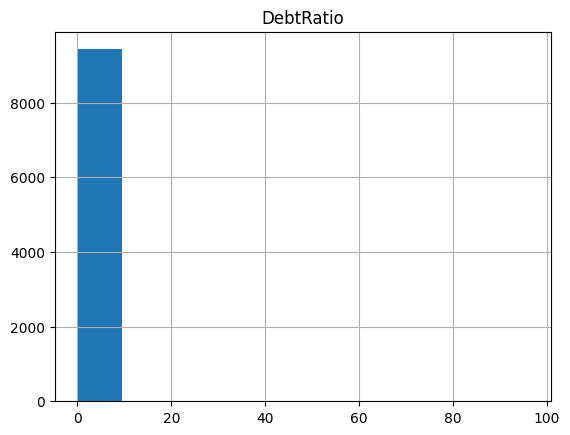

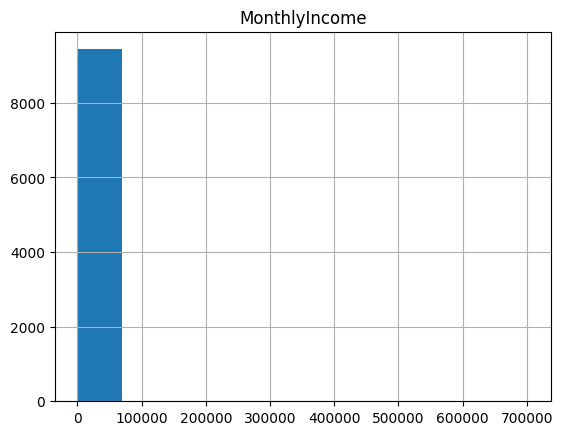

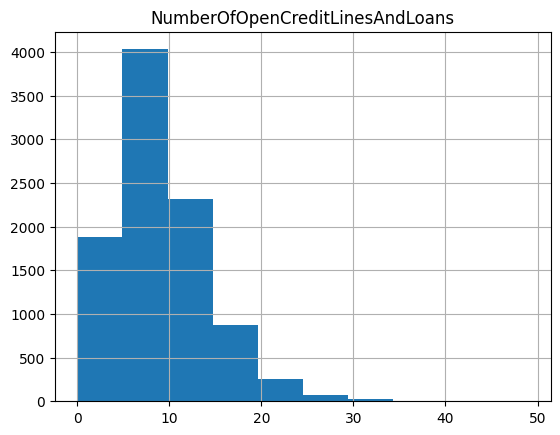

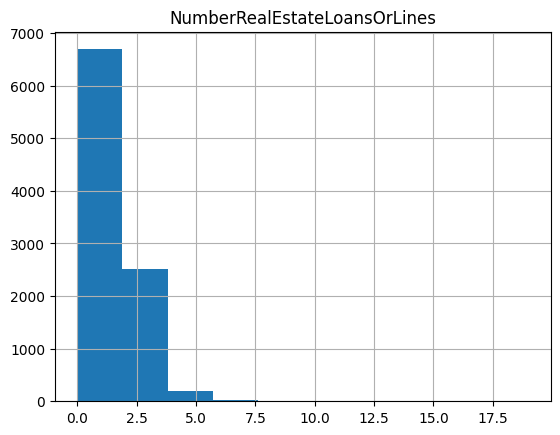

In [836]:
# BASE LINE --> Regresión logística

# El primer modelo que vamos a entrenar y que servirá como baseline es la regresión logística. Veamos la distribución de cada variable numérica para decidir cuál necesita 
# tratamiento previo al escalado. Vamos a aplicar el logaritmo a todas variables exceptuando 'age' y 'number of open credit lines and loans' 

for variable in features_num:
    df_eda.hist(variable)

In [837]:
# TRATAMIENTO DE LAS FEATURES

features_a_tratar = features_num.copy()
features_a_tratar.remove('age')
features_a_tratar.remove('NumberOfOpenCreditLinesAndLoans') # quitamos de la lista las dos variables que no vamos a transformar

In [838]:
X_train_transformed = X_train.copy() # me creo una copia donde aplicar las transformaciones, me reservo el X_train sin tratar para posteriores modelos

# al ejecutar el siguiente código, sólo le sienta bien el logaritmo a 'revolving' y 'monthly income'; para el resto, probaremos con la raíz cuadrada o cúbica.

#for col in features_a_tratar:
 #   X_train_transformed[col] = (X_train_transformed[col]+1).apply(np.log) # aplicamos el log +1 a todas ellas 


In [839]:
X_train_transformed["MonthlyIncome"] = (X_train_transformed["MonthlyIncome"]+1).apply(np.log)
X_train_transformed.RevolvingUtilizationOfUnsecuredLines = (X_train_transformed["RevolvingUtilizationOfUnsecuredLines"]+1).apply(np.log)

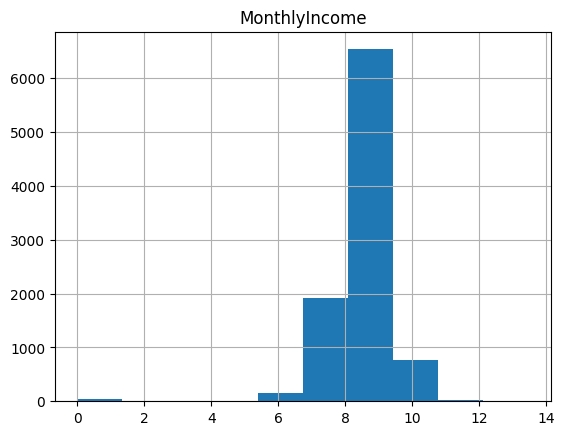

In [840]:
X_train_transformed.hist("MonthlyIncome");

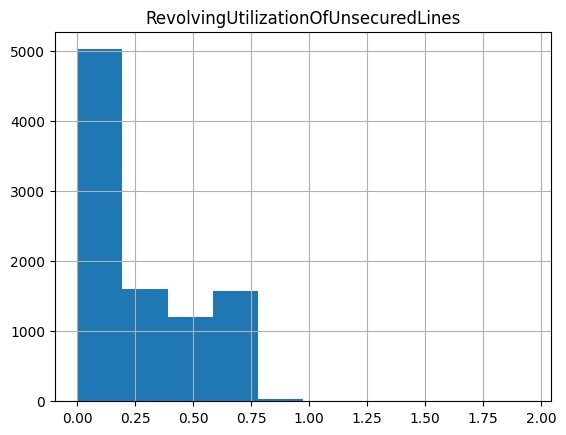

In [841]:
X_train_transformed.hist("RevolvingUtilizationOfUnsecuredLines");

In [842]:
# se lo aplicamos al set de test
X_test_transformed = X_test.copy()
X_test_transformed["MonthlyIncome"] = (X_test_transformed["MonthlyIncome"]+1).apply(np.log)
X_test_transformed.RevolvingUtilizationOfUnsecuredLines = (X_test_transformed["RevolvingUtilizationOfUnsecuredLines"]+1).apply(np.log)

In [843]:
# quitamos de la lista las dos variables a las que les hemos aplicado el logaritmo:

features_a_tratar.remove("MonthlyIncome")
features_a_tratar.remove("RevolvingUtilizationOfUnsecuredLines")

features_a_tratar

['DebtRatio', 'NumberRealEstateLoansOrLines']

<Axes: >

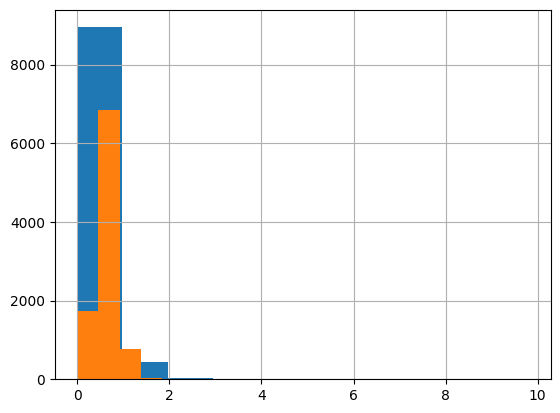

In [844]:
# probamos con las raíces cuadrada y cúbica con el resto

np.sqrt(X_train["DebtRatio"]).hist() # Azul
np.cbrt(X_train["DebtRatio"]).hist() # Naranja ---> nos quedamos con ésta

In [845]:
# lo aplicamos a train y a test

X_train_transformed.DebtRatio = np.cbrt(X_train_transformed["DebtRatio"])
X_test_transformed.DebtRatio = np.cbrt(X_test_transformed["DebtRatio"])

# lo quitamos de la lista de features a tratar:

features_a_tratar.remove("DebtRatio")

In [846]:
features_a_tratar # ya solo nos queda una

['NumberRealEstateLoansOrLines']

<Axes: >

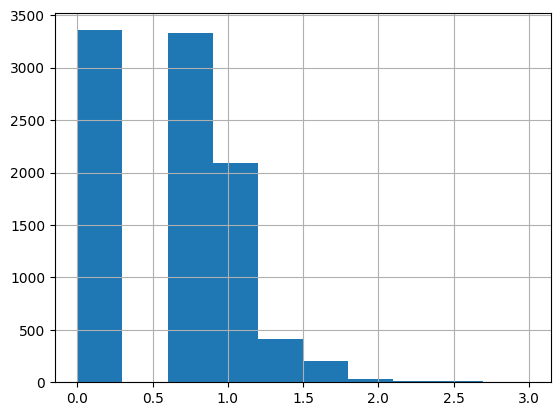

In [847]:
#np.sqrt(X_train_transformed["NumberRealEstateLoansOrLines"]).hist() 
np.log(X_train_transformed["NumberRealEstateLoansOrLines"]+1).hist() # ninguna me acaba de convencer, pero finalmente me quedo con el logaritmo
#np.cbrt(X_train_transformed["NumberRealEstateLoansOrLines"]).hist()  

In [848]:
# lo aplicamos a train y a test

X_train_transformed.NumberRealEstateLoansOrLines = np.log(X_train_transformed["NumberRealEstateLoansOrLines"]+1)
X_test_transformed.NumberRealEstateLoansOrLines = np.log(X_test_transformed["NumberRealEstateLoansOrLines"]+1)

# lo quitamos de la lista de features a tratar:

features_a_tratar.remove("NumberRealEstateLoansOrLines")

In [849]:
# ESTANDARIZACIÓN 

# Por último, escalamos las numéricas en train y test 

scaler = StandardScaler()

X_train_transformed[features_num] = scaler.fit_transform(X_train_transformed[features_num])

X_test_transformed[features_num] = scaler.transform(X_test_transformed[features_num])

In [850]:
X_train_transformed[features_num].describe()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines
count,9.452000e+03,9.452000e+03,9.452000e+03,9.452000e+03,9.452000e+03,9.452000e+03
mean,-4.134559e-18,6.615294e-17,1.695169e-16,2.292801e-16,2.104866e-17,-1.593685e-16
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,-1.032140e+00,-2.103078e+00,-2.288272e+00,-9.794170e+00,-1.711259e+00,-1.188690e+00
25%,-8.942225e-01,-7.236275e-01,-4.287357e-01,-4.378814e-01,-7.383611e-01,-1.188690e+00
50%,-3.688182e-01,-3.390248e-02,6.828632e-02,7.964098e-02,-1.546221e-01,1.933688e-01
75%,8.276328e-01,7.247951e-01,4.713953e-01,5.643027e-01,4.291169e-01,1.001821e+00
max,6.798019e+00,3.414723e+00,1.387423e+01,5.658833e+00,7.823144e+00,4.784469e+00


In [851]:
# PRIMER MODELADO --> Baseline con regresión logística

log_reg = LogisticRegression(class_weight = "balanced", max_iter = 1000,random_state= 42) # Hiperparámetros class_weight balanced puesto que la distribución del target está muy desbalanceada

log_reg.fit(X_train_transformed, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8789
           1       0.22      0.76      0.34       663

    accuracy                           0.80      9452
   macro avg       0.60      0.78      0.61      9452
weighted avg       0.92      0.80      0.84      9452



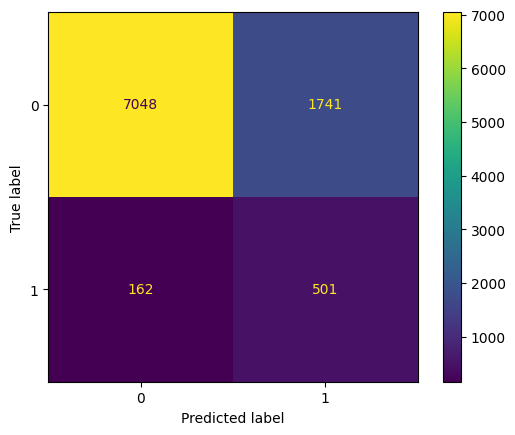

In [852]:
y_pred = log_reg.predict(X_train_transformed)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
print(classification_report(y_train, y_pred))

In [853]:
# SEGUNDO MODELADO --> KNN

#  Vamos a utilizar nuestro X_train_trainsformed puesto que los KNN son sensibles al escalado.

knn = KNeighborsClassifier(n_neighbors=3)

X = X_train_transformed
y = y_train

knn.fit(X,y) 


KNeighborsClassifier(n_neighbors=3)

In [854]:
print(classification_report(y_train, knn.predict(X_train_transformed)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8789
           1       0.76      0.39      0.51       663

    accuracy                           0.95      9452
   macro avg       0.86      0.69      0.74      9452
weighted avg       0.94      0.95      0.94      9452



In [855]:
print(classification_report(y_test, knn.predict(X_test_transformed)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2197
           1       0.42      0.18      0.25       167

    accuracy                           0.92      2364
   macro avg       0.68      0.58      0.61      2364
weighted avg       0.90      0.92      0.91      2364



In [856]:
from sklearn.ensemble import RandomForestClassifier

                                                    
rnd_clf = RandomForestClassifier(n_estimators= 150,
                                 max_depth= 4,  
                                 random_state=42,
                                 class_weight= "balanced")

rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

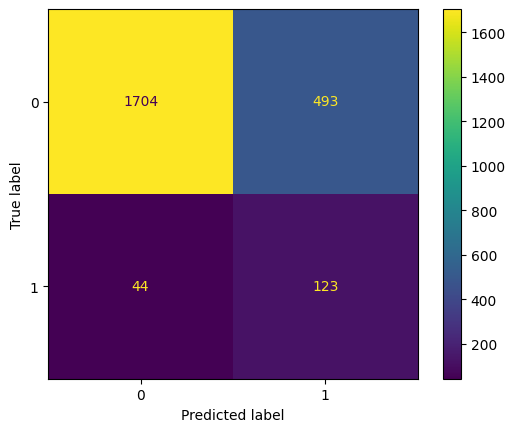

In [857]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      2197
           1       0.20      0.74      0.31       167

    accuracy                           0.77      2364
   macro avg       0.59      0.76      0.59      2364
weighted avg       0.92      0.77      0.83      2364



In [ ]:
# OPTIMIZACIÓN DE HIPERPRÁMETROS

# He probado varias combinaciones de hiperparámeros con randomized search, no consigo obtener mejores resultados. Esta parte del proceso todavía me crea un poco de confusión.
# Me faltaría por hacer la validación cruzada y la elección del mejor modelo. Por otra parte, no estoy segura de haber hecho bien el modelo de knn. 

rnd = RandomForestClassifier(n_estimators= 150)

tree_param_grid = {
    'max_depth': range(1, 11),
    'min_samples_split': [3,4,5,6],
    'min_samples_leaf': [10,12,14,16],
    'class_weight': ["balanced"]
}


In [872]:
# RandomizedSearch para RandomForest

tree_random_search = RandomizedSearchCV(rnd, tree_param_grid, n_iter=30, cv=5, scoring='balanced_accuracy', random_state=42)
tree_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=150),
                   n_iter=30,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': range(1, 11),
                                        'min_samples_leaf': [10, 12, 14, 16],
                                        'min_samples_split': [3, 4, 5, 6]},
                   random_state=42, scoring='balanced_accuracy')

In [873]:
tree_random_search.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 14,
 'max_depth': 5,
 'class_weight': 'balanced'}

In [874]:
tree_random_search.best_score_

np.float64(0.766656266091541)

In [875]:
y_pred = tree_random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      2197
           1       0.23      0.65      0.34       167

    accuracy                           0.82      2364
   macro avg       0.60      0.74      0.62      2364
weighted avg       0.92      0.82      0.86      2364

